# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#generate the url
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#partial query url
query_url = f"{base_url}appid={weather_api_key}&units={units}&q=" 

In [4]:
# Set up lists to hold data
cityname=[] 
cloud=[]
ctry=[]
date=[]
humid=[]
lat=[]
lng=[]
maxtemp=[]
wind=[]

# Loop through the list of cities and perform a request for data on each
#start count at 1 instead of 0
count=1 

print('Beginning Data Retrieval')     
print('---------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:
            cityname.append(response['name'])
            cloud.append(response['clouds']['all'])
            ctry.append(response['sys']['country'])
            date.append(response['dt'])
            humid.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            
            print(city + ' not found. Skipping to next...')
                                            
        count=count+1

Beginning Data Retrieval
---------------------------
Processing Record 1 of 604 | salalah
Processing Record 2 of 604 | lugovoy
Processing Record 3 of 604 | rikitea
Processing Record 4 of 604 | yellowknife
Processing Record 5 of 604 | butaritari
Processing Record 6 of 604 | mataura
Processing Record 7 of 604 | barrow
Processing Record 8 of 604 | carnarvon
Processing Record 9 of 604 | busselton
Processing Record 10 of 604 | fare
Processing Record 11 of 604 | cherskiy
Processing Record 12 of 604 | hermanus
Processing Record 13 of 604 | san rafael
Processing Record 14 of 604 | vaini
Processing Record 15 of 604 | hilo
Processing Record 16 of 604 | kavieng
Processing Record 17 of 604 | inhambane
Processing Record 18 of 604 | palmer
Processing Record 19 of 604 | mandalgovi
Processing Record 20 of 604 | cabo san lucas
Processing Record 21 of 604 | albany
Processing Record 22 of 604 | halifax
Processing Record 23 of 604 | grand centre
grand centre not found. Skipping to next...
Processing Recor

Processing Record 187 of 604 | camocim
Processing Record 188 of 604 | hithadhoo
Processing Record 189 of 604 | nguiu
nguiu not found. Skipping to next...
Processing Record 190 of 604 | henties bay
Processing Record 191 of 604 | leningradskiy
Processing Record 192 of 604 | lazaro cardenas
Processing Record 193 of 604 | huilong
Processing Record 194 of 604 | gorin
Processing Record 195 of 604 | tateyama
Processing Record 196 of 604 | groves
Processing Record 197 of 604 | makat
Processing Record 198 of 604 | grafton
Processing Record 199 of 604 | vernon
Processing Record 200 of 604 | borova
Processing Record 201 of 604 | coquimbo
Processing Record 202 of 604 | hasaki
Processing Record 203 of 604 | chuy
Processing Record 204 of 604 | barentsburg
barentsburg not found. Skipping to next...
Processing Record 205 of 604 | baykit
Processing Record 206 of 604 | flinders
Processing Record 207 of 604 | kalabo
Processing Record 208 of 604 | mount gambier
Processing Record 209 of 604 | dzhebariki-kh

Processing Record 373 of 604 | cayenne
Processing Record 374 of 604 | grindavik
Processing Record 375 of 604 | buchanan
Processing Record 376 of 604 | katsuura
Processing Record 377 of 604 | saint-augustin
Processing Record 378 of 604 | nelson bay
Processing Record 379 of 604 | ruatoria
ruatoria not found. Skipping to next...
Processing Record 380 of 604 | nadym
Processing Record 381 of 604 | norman wells
Processing Record 382 of 604 | mys shmidta
mys shmidta not found. Skipping to next...
Processing Record 383 of 604 | seddon
Processing Record 384 of 604 | high level
Processing Record 385 of 604 | ampanihy
Processing Record 386 of 604 | hovd
Processing Record 387 of 604 | yingkou
Processing Record 388 of 604 | dalby
Processing Record 389 of 604 | klaksvik
Processing Record 390 of 604 | atka
atka not found. Skipping to next...
Processing Record 391 of 604 | karratha
Processing Record 392 of 604 | kysyl-syr
Processing Record 393 of 604 | miroslav
Processing Record 394 of 604 | iqaluit
P

Processing Record 564 of 604 | evensk
Processing Record 565 of 604 | vestmannaeyjar
Processing Record 566 of 604 | umm kaddadah
Processing Record 567 of 604 | svatove
Processing Record 568 of 604 | ler
Processing Record 569 of 604 | aasiaat
Processing Record 570 of 604 | rosita
Processing Record 571 of 604 | vorontsovka
Processing Record 572 of 604 | abonnema
Processing Record 573 of 604 | mackenzie
Processing Record 574 of 604 | aklavik
Processing Record 575 of 604 | palmares do sul
Processing Record 576 of 604 | bose
Processing Record 577 of 604 | manokwari
Processing Record 578 of 604 | canandaigua
Processing Record 579 of 604 | zalantun
Processing Record 580 of 604 | santa maria da boa vista
Processing Record 581 of 604 | hambantota
Processing Record 582 of 604 | aranda de duero
Processing Record 583 of 604 | cedar city
Processing Record 584 of 604 | artyk
artyk not found. Skipping to next...
Processing Record 585 of 604 | kidal
Processing Record 586 of 604 | atlantic beach
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_dict = {"City":cityname, "Cloudiness":cloud, "Date":date, "Humidity":humid, "Lat":lat, "Lng":lng, 
                "Max Temp":maxtemp, "Wind Speed":wind,"Country":ctry}
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Country
0,Salalah,100,1659489615,100,17.0151,54.0924,75.29,4.61,OM
1,Lugovoy,2,1659489736,67,42.9472,72.7644,66.65,9.66,KZ
2,Rikitea,40,1659489509,73,-23.1203,-134.9692,72.34,20.58,PF
3,Yellowknife,18,1659488981,43,62.4560,-114.3525,62.20,8.32,CA
4,Butaritari,20,1659489209,75,3.0707,172.7902,82.02,15.99,KI
...,...,...,...,...,...,...,...,...,...
545,Ilulissat,75,1659489993,87,69.2167,-51.1000,48.22,1.14,GL
546,Genhe,97,1659489993,51,50.7833,121.5167,78.35,3.58,CN
547,Nha Trang,100,1659489781,87,12.2500,109.1833,86.00,3.74,VN
548,Cap Malheureux,1,1659489642,78,-19.9842,57.6142,66.47,3.00,MU


In [9]:
weather_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

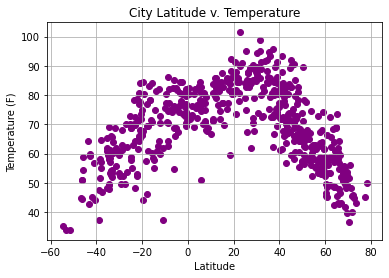

In [15]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], color="purple")
plt.title("City Latitude v. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(b=True,which="major",axis="both")
plt.savefig("output_data/Fig1.png")
plt.show()

This scatter plot displays the relationship between latitude and temperature. The data on this graph shows that as you travel further north or south away from the equator (latitude 0), the temperature declines substantially.

## Latitude vs. Humidity Plot

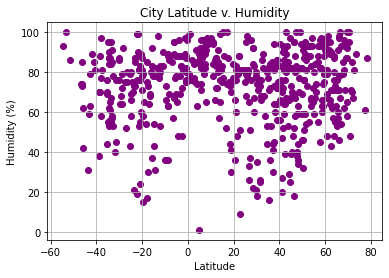

In [16]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], color="purple")
plt.title("City Latitude v. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True,which="major",axis="both")
plt.savefig("output_data/Fig2.png")
plt.show()

This scatter plot displays the relationship between latitude and humidity percentage. The data on this graph doesn't really have any strong correlations one way or the other. However, it is interesting that the area nearest the equator has hardly any values less than 60% humidity.

## Latitude vs. Cloudiness Plot

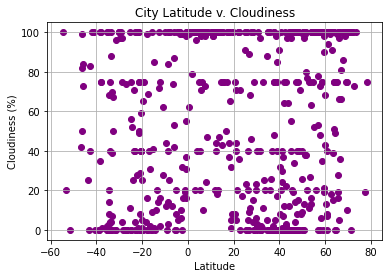

In [17]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], color="purple")
plt.title("City Latitude v. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,which="major",axis="both")
plt.savefig("output_data/Fig3.png")
plt.show()

This scatter plot displays the relationship between latitude and cloudiness percentage. The data on this graph is completely variable and does not show any correlations one way or another.

## Latitude vs. Wind Speed Plot

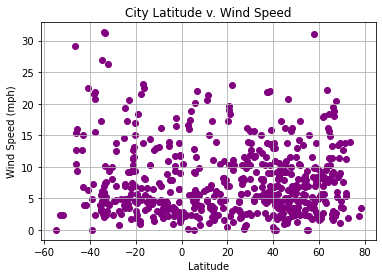

In [19]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], color="purple")
plt.title("City Latitude v. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,which="major",axis="both")
plt.savefig("output_data/Fig4.png")
plt.show()

This scatter plot displays the relationship between latitude and wind speeds. This data suggests latitude does not really play a factor in wind strength and that its more common for wind speeds to be lower than 15 miles per hour.

## Linear Regression

In [23]:
#create Northern Hem dataframe
north_df = weather_df[weather_df["Lat"]>=0]

#create Southern Hem dataframe
south_df = weather_df[weather_df["Lat"]<0]
#north_df
#south_df

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Country
2,Rikitea,40,1659489509,73,-23.1203,-134.9692,72.34,20.58,PF
5,Mataura,99,1659489500,85,-46.1927,168.8643,44.47,10.40,NZ
7,Carnarvon,56,1659489196,58,-24.8667,113.6333,68.58,19.39,AU
8,Busselton,100,1659489505,67,-33.6500,115.3333,54.09,31.21,AU
9,Fare,31,1659489739,69,-16.7000,-151.0167,78.26,23.13,PF
...,...,...,...,...,...,...,...,...,...
529,Santa Maria da Boa Vista,100,1659489984,63,-8.8078,-39.8256,74.71,16.15,BR
535,Tuatapere,50,1659489652,73,-46.1333,167.6833,51.03,12.73,NZ
538,Walvis Bay,4,1659489396,87,-22.9575,14.5053,48.09,3.44,NA
548,Cap Malheureux,1,1659489642,78,-19.9842,57.6142,66.47,3.00,MU


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

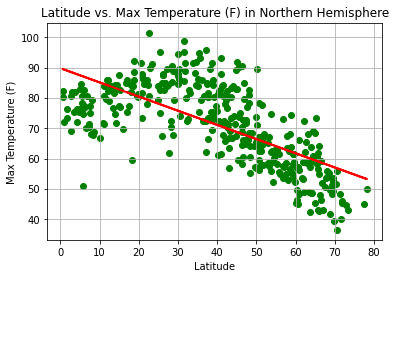

In [55]:
x_value = north_df["Lat"]
y_value = north_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Max Temperature (F) in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=16)
plt.savefig("output_data/Fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

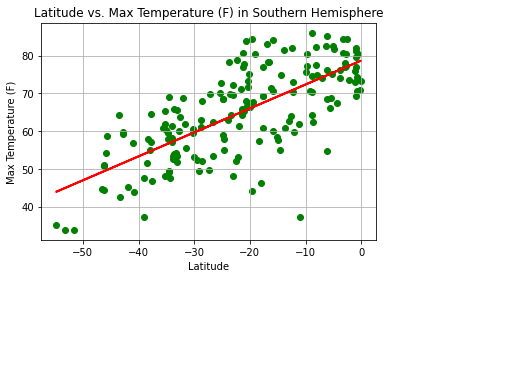

In [54]:
x_value = south_df["Lat"]
y_value = south_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Max Temperature (F) in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=16)
plt.savefig("output_data/Fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

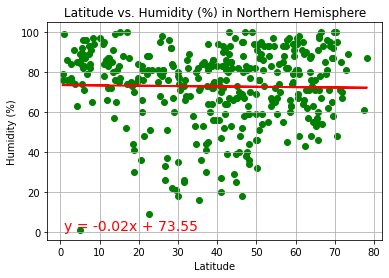

In [53]:
x_value = north_df["Lat"]
y_value = north_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Humidity (%) in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=14)
plt.savefig("output_data/Fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

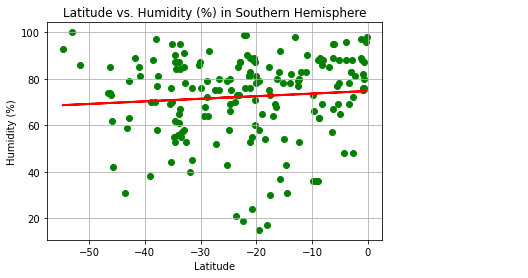

In [52]:
x_value = south_df["Lat"]
y_value = south_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Humidity (%) in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=16)
plt.savefig("output_data/Fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

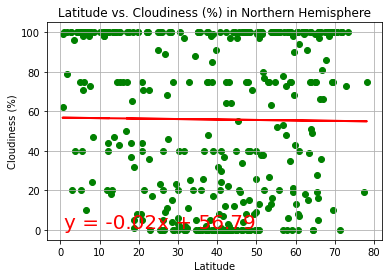

In [47]:
x_value = north_df["Lat"]
y_value = north_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Cloudiness (%) in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=20)
plt.savefig("output_data/Fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

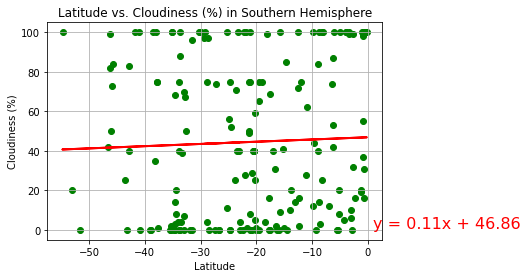

In [49]:
x_value = south_df["Lat"]
y_value = south_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Cloudiness (%) in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=16)
plt.savefig("output_data/Fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

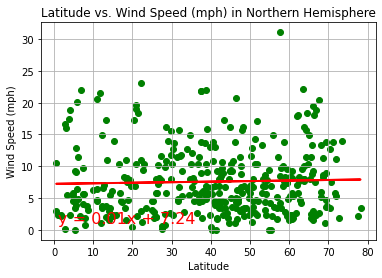

In [50]:
x_value = north_df["Lat"]
y_value = north_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Wind Speed (mph) in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=16)
plt.savefig("output_data/Fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

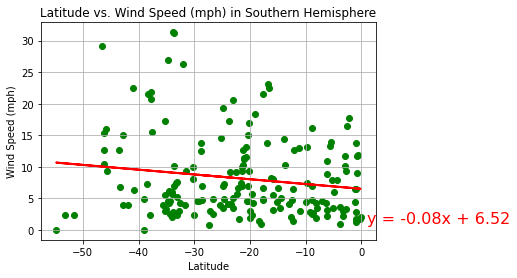

In [51]:
x_value = south_df["Lat"]
y_value = south_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Wind Speed (mph) in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=16)
plt.savefig("output_data/Fig12.png")
plt.show()